In [169]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

# Step1: Create a dataset for clustering using "sklearn.datasets.make_blobs". 

In [170]:
X, y = make_blobs(n_samples=1000, n_features=2, centers=3)

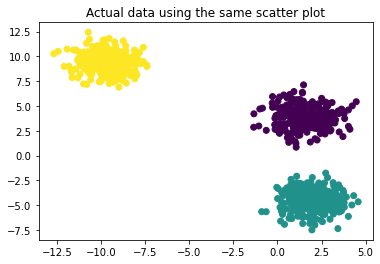

In [171]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0],X[:, 1],marker="o", c=y)
plt.title('Actual data using the same scatter plot')
plt.show()

Step2: K-Means and GMMs to cluster the data. "sklearn.cluster.KMeans" and "sklearn.mixture.GaussianMixture". You can use the "fit_predict" 

In [172]:
KMSHscore = []
Kcluster = KMeans(n_clusters=2,random_state=None)
y_pred = Kcluster.fit_predict(X)
score = silhouette_score(X, y_pred)
print(score)

0.7299052799264598


In [173]:

GMSHscore = []
Gcluster = GaussianMixture(n_components=2, random_state=None)
y_pred = Gcluster.fit_predict(X)
score = silhouette_score(X, y_pred)
print(score)

0.7299052799264598


In [174]:
def plotTrainingHist(history,i):
    axis[i].plot([3,5,8],history['knn'])
    axis[i].plot([3,5,8],history['gm'])
    axis[i].set_title('silhouette_score')
    axis[i].set_xlabel('clusters')
    axis[i].set_ylabel('silhouette_score')
    axis[i].legend(['knn', 'gm'], loc='best')

Step 3: Repeat step 1 and step 2 for different number of "real clusters"

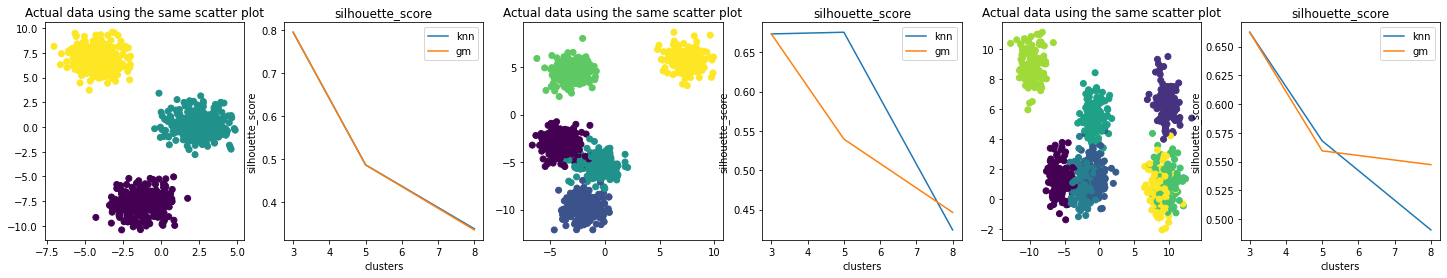

In [175]:
center_real_cluster = [3,5,8]
fig, axis = plt.subplots(1, 6, figsize=(25,4))
cnt = 0
for i in center_real_cluster:
    X1, y1  = make_blobs(n_samples=1000, n_features=2, centers=i,random_state=None)
    axis[cnt].scatter(X1[:,0],X1[:,1], marker = "o", c=y1)
    axis[cnt].set_title('Actual data using the same scatter plot')
    cnt+=1
    history = {'knn':[],'gm':[]}
    for j in center_real_cluster:
        Kcluster = KMeans(n_clusters=j,random_state=None)
        y1_pred = Kcluster.fit_predict(X1)
        scoreKM = silhouette_score(X1, y1_pred)
        KMSHscore.append(scoreKM)
        history['knn'].append(scoreKM)
        Gcluster = GaussianMixture(n_components=j, random_state=None)
        y1_pred = Gcluster.fit_predict(X1)
        scoreGM = silhouette_score(X1, y1_pred)
        GMSHscore.append(scoreGM)
        history['gm'].append(scoreGM)
    plotTrainingHist(history,cnt)
    cnt+=1
            
    

In [176]:
print(KMSHscore)

[0.7946437693678277, 0.48642346548632964, 0.33800153781702336, 0.6732866872368446, 0.6754184309753016, 0.4241783066947003, 0.6624723580933063, 0.567959435548234, 0.49048325217930416]


In [177]:
print(GMSHscore)

[0.7946437693678277, 0.48630171761919283, 0.33526286613855, 0.6730483588474622, 0.5395635379674157, 0.44649740658421705, 0.6624723580933063, 0.5592770182058278, 0.5472521765204312]


As the above plot we can see that both models as perfromed. But as compared to Kmeans cluster, GMM models slightly has seen better performance